### Data Inclusion

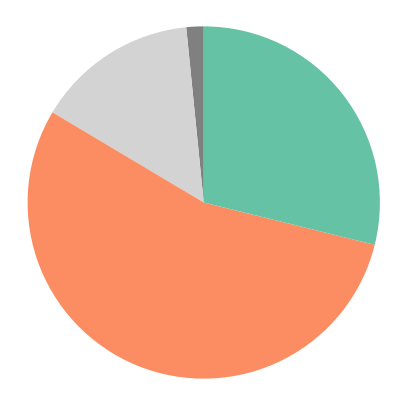

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Data
f, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(aspect="equal"))
labels = ['Excluded: No clinical data (N=11)', 'Excluded: Less than 500 cells (N=40)', 'Discovery set (N=379)', "Inner validation set (N=200)"]
sizes = [11, 103, 379, 200]
colors = ['grey','lightgrey',sns.color_palette("Set2")[1],sns.color_palette("Set2")[0]]
pie = ax.pie(sizes, labels=None,  startangle=90, colors=colors,wedgeprops=dict( linewidth=1))
# ax.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize = 12, )

# Equal aspect ratio ensures that the pie chart is circular.
plt.axis('equal')

# Show the plot
plt.show()

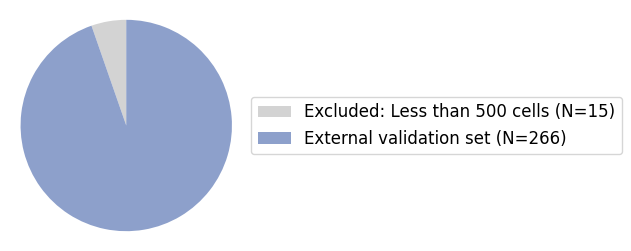

In [48]:
f, ax = plt.subplots(figsize=(3,3), subplot_kw=dict(aspect="equal"))
labels = ['Excluded: Less than 500 cells (N=15)',  "External validation set (N=266)"]
sizes = [15, 266]
colors = ['lightgrey',sns.color_palette("Set2")[2]]
pie = ax.pie(sizes, labels=None,  startangle=90, colors=colors,wedgeprops=dict( linewidth=1))
ax.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize = 12, )

# Equal aspect ratio ensures that the pie chart is circular.
plt.axis('equal')
# Show the plot
plt.show()

### Clinical Variables

### Discovery

In [50]:
import pandas as pd
import os
import sys
import pickle
sys.path.append("./..")
from utils import PROJECT_ROOT, process_Danenberg_clinical_data, process_Jackson_clinical_data

clinical = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Input",
        "Clinical",
        "Danenberg",
        "clinical.csv",
    )
)
SoftWL_dict = pickle.load(
    open(
        os.path.join(
            PROJECT_ROOT,
            "Output",
            "b_Soft_WL_Kernel_random_split",
            "Danenberg",
            "Subset_1",
            "SoftWL_dict_iter_"
            + str(2)
            + "_PhenoGraph_k_"
            + str(30)
            +'_'
            +str('CellType')
            + ".pkl",
        ),
        "rb",
    ),
)

# SoftWL_dict = pickle.load(
#     open(
#         os.path.join(
#             PROJECT_ROOT,
#             "Output",
#             "b_Soft_WL_Kernel_random_split",
#             "Danenberg",
#             "Subset_2",
#             "Matched_SoftWL_dict_iter_"
#             + str(2)
#             + "_PhenoGraph_k_"
#             + str(30)
#             +'_'
#             +str('CellType')
#             + "_centroid_alignment.pkl",
#         ),
#         "rb",
#     ),
# )
Patient_IDs = SoftWL_dict["Patient_id"]

In [60]:

Length = [clinical.loc[clinical['patient_id'] == i, 'Overall Survival (Months)'].values[0] for i in Patient_IDs]
Status = [clinical.loc[clinical['patient_id'] == i,  'Overall Survival Status'].values[0] for i in Patient_IDs] 
DF = pd.DataFrame({"Length": Length, "Status": Status,}).dropna()
Length_ = np.array(DF["Length"])
Status_ = np.array(DF["Status"]) 
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(durations=Length_, event_observed=Status_)

survival_probability_at_5_years = kmf.predict(5*12)

print("5-year Survival rate:", survival_probability_at_5_years)

Length = [clinical.loc[clinical['patient_id'] == i, 'Disease-specific Survival (Months)'].values[0] for i in Patient_IDs]
Status = [clinical.loc[clinical['patient_id'] == i,  'Disease-specific Survival Status'].values[0] for i in Patient_IDs] 
DF = pd.DataFrame({"Length": Length, "Status": Status,}).dropna()
Length_ = np.array(DF["Length"])
Status_ = np.array(DF["Status"]) 
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(durations=Length_, event_observed=Status_)

survival_probability_at_5_years = kmf.predict(5*12)

print("5-year Survival rate:", survival_probability_at_5_years)

5-year Survival rate: 0.7314952802741491
5-year Survival rate: 0.7950483737477708


In [46]:
feature_name = 'Lymph nodes examined positive'
Feature = np.array(
    [
        clinical.loc[clinical["patient_id"] == patient_id, feature_name].values[0]
        for patient_id in Patient_IDs
    ]
)
print(len(Feature))

if feature_name == 'Lymph nodes examined positive':
    feature_list = ['Yes', 'No']
    compare_list = [('Yes', 'No')]
    # Feature = np.array([feature_list[0] if feature > 0 else feature_list[1] for feature in Feature])
if feature_name == 'PAM50':
    feature_list = ['Luminal A', 'Luminal B', 'HER2', 'Basal', 'Normal-like']
    compare_list_1 = [('HER2', 'Luminal A'), ('HER2', 'Luminal B'), ('HER2', 'Basal'), ('HER2', 'Normal-like') ]
    compare_list_2 = [('Luminal A', 'Luminal B'), ('Luminal A', 'Basal'), ('Luminal A', 'Normal-like'), ('Luminal A', 'HER2')]
if feature_name == 'Age at Diagnosis':
    feature_list = ['<50', '50-70', '>70']
    compare_list = [('50-70', '<50'), ('>70', '50-70'), ('>70', '<50')]
    Feature = np.array([feature_list[0] if feature < 50 else feature_list[1] if feature < 70 else feature_list[2] for feature in Feature])
if feature_name == 'Mutation Count':
    feature_list = ['<10', '10-20', '20-30']
    compare_list = [('10-20', '<10'), ('20-30', '10-20'), ('20-30', '<10')]
    Feature = np.array([feature_list[0] if feature < 10 else feature_list[1] if feature < 20 else feature_list[2] for feature in Feature])
if feature_name == 'Tumor Stage':
    feature_list = [1,2,3, 4]
    compare_list = [ (1,2), (3,4) ,(2,3),]
elif feature_name == 'Grade':
    feature_list = [1,2,3]
    compare_list = [(1,2), (2,3), (1,3)]
for feature in np.unique(Feature):
    print(feature, np.sum(Feature == feature), np.sum(Feature == feature)/len(Feature)* 100)
print(np.isnan(Feature).sum(), np.isnan(Feature).sum()/len(Feature)* 100)

379
0.0 136 35.88390501319261
1.0 66 17.41424802110818
2.0 28 7.387862796833773
3.0 23 6.068601583113456
4.0 5 1.3192612137203166
5.0 9 2.3746701846965697
6.0 12 3.16622691292876
7.0 6 1.58311345646438
8.0 1 0.2638522427440633
9.0 3 0.79155672823219
10.0 3 0.79155672823219
11.0 2 0.5277044854881267
13.0 3 0.79155672823219
14.0 3 0.79155672823219
15.0 1 0.2638522427440633
16.0 2 0.5277044854881267
17.0 1 0.2638522427440633
19.0 2 0.5277044854881267
21.0 1 0.2638522427440633
22.0 2 0.5277044854881267
23.0 1 0.2638522427440633
25.0 1 0.2638522427440633
nan 0 0.0
68 17.941952506596305


### Inner Validation

In [61]:
import pandas as pd
import os
import sys
import pickle
sys.path.append("./..")
from utils import PROJECT_ROOT, process_Danenberg_clinical_data, process_Jackson_clinical_data

clinical = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Input",
        "Clinical",
        "Danenberg",
        "clinical.csv",
    )
)


SoftWL_dict = pickle.load(
    open(
        os.path.join(
            PROJECT_ROOT,
            "Output",
            "b_Soft_WL_Kernel_random_split",
            "Danenberg",
            "Subset_2",
            "Matched_SoftWL_dict_iter_"
            + str(2)
            + "_PhenoGraph_k_"
            + str(30)
            +'_'
            +str('CellType')
            + "_centroid_alignment.pkl",
        ),
        "rb",
    ),
)
Patient_IDs = SoftWL_dict["Patient_id"]

In [62]:

Length = [clinical.loc[clinical['patient_id'] == i, 'Overall Survival (Months)'].values[0] for i in Patient_IDs]
Status = [clinical.loc[clinical['patient_id'] == i,  'Overall Survival Status'].values[0] for i in Patient_IDs] 
DF = pd.DataFrame({"Length": Length, "Status": Status,}).dropna()
Length_ = np.array(DF["Length"])
Status_ = np.array(DF["Status"]) 
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(durations=Length_, event_observed=Status_)

survival_probability_at_5_years = kmf.predict(5*12)

print("5-year Survival rate:", survival_probability_at_5_years)

Length = [clinical.loc[clinical['patient_id'] == i, 'Disease-specific Survival (Months)'].values[0] for i in Patient_IDs]
Status = [clinical.loc[clinical['patient_id'] == i,  'Disease-specific Survival Status'].values[0] for i in Patient_IDs] 
DF = pd.DataFrame({"Length": Length, "Status": Status,}).dropna()
Length_ = np.array(DF["Length"])
Status_ = np.array(DF["Status"]) 
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(durations=Length_, event_observed=Status_)

survival_probability_at_5_years = kmf.predict(5*12)

print("5-year Survival rate:", survival_probability_at_5_years)

5-year Survival rate: 0.789134813259144
5-year Survival rate: 0.8311921150898479


In [48]:
feature_name = 'Lymph nodes examined positive'
Feature = np.array(
    [
        clinical.loc[clinical["patient_id"] == patient_id, feature_name].values[0]
        for patient_id in Patient_IDs
    ]
)
print(len(Feature))

if feature_name == 'Lymph nodes examined positive':
    feature_list = ['Yes', 'No']
    compare_list = [('Yes', 'No')]
    # Feature = np.array([feature_list[0] if feature > 0 else feature_list[1] for feature in Feature])
if feature_name == 'PAM50':
    feature_list = ['Luminal A', 'Luminal B', 'HER2', 'Basal', 'Normal-like']
    compare_list_1 = [('HER2', 'Luminal A'), ('HER2', 'Luminal B'), ('HER2', 'Basal'), ('HER2', 'Normal-like') ]
    compare_list_2 = [('Luminal A', 'Luminal B'), ('Luminal A', 'Basal'), ('Luminal A', 'Normal-like'), ('Luminal A', 'HER2')]
if feature_name == 'Age at Diagnosis':
    feature_list = ['<50', '50-70', '>70']
    compare_list = [('50-70', '<50'), ('>70', '50-70'), ('>70', '<50')]
    Feature = np.array([feature_list[0] if feature < 50 else feature_list[1] if feature < 70 else feature_list[2] for feature in Feature])
if feature_name == 'Mutation Count':
    feature_list = ['<10', '10-20', '20-30']
    compare_list = [('10-20', '<10'), ('20-30', '10-20'), ('20-30', '<10')]
    Feature = np.array([feature_list[0] if feature < 10 else feature_list[1] if feature < 20 else feature_list[2] for feature in Feature])
if feature_name == 'Tumor Stage':
    feature_list = [1,2,3, 4]
    compare_list = [ (1,2), (3,4) ,(2,3),]
elif feature_name == 'Grade':
    feature_list = [1,2,3]
    compare_list = [(1,2), (2,3), (1,3)]
for feature in np.unique(Feature):
    print(feature, np.sum(Feature == feature), np.sum(Feature == feature)/len(Feature)* 100)
print(np.isnan(Feature).sum(), np.isnan(Feature).sum()/len(Feature)* 100)

200
0.0 73 36.5
1.0 32 16.0
2.0 12 6.0
3.0 9 4.5
4.0 6 3.0
5.0 4 2.0
6.0 11 5.5
7.0 5 2.5
8.0 5 2.5
9.0 1 0.5
10.0 2 1.0
11.0 1 0.5
12.0 2 1.0
14.0 1 0.5
15.0 2 1.0
16.0 1 0.5
17.0 1 0.5
18.0 1 0.5
21.0 1 0.5
24.0 1 0.5
25.0 1 0.5
26.0 1 0.5
41.0 1 0.5
nan 0 0.0
26 13.0


### Externa; vaidatopm

In [63]:
clinical = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Input",
        "Clinical",
        "Jackson",
        "clinical.csv",
    )
)
clinical = process_Jackson_clinical_data(clinical)
clinical.head()
SoftWL_dict = pickle.load(
    open(
        os.path.join(
            PROJECT_ROOT,
            "Output",
            "b_Soft_WL_Kernel_random_split",
            "Jackson",
            "Matched_SoftWL_dict_iter_"
            + str(2)
            + "_PhenoGraph_k_"
            + str(30)
            +'_'
            +str('CellType')
            + "_centroid_alignment.pkl",
        ),
        "rb",
    ),
)

Histograms = SoftWL_dict["Histogram"]
Patient_IDs = SoftWL_dict["Patient_id"]


In [64]:

Length = [clinical.loc[clinical['patient_id'] == i, 'Overall Survival (Months)'].values[0] for i in Patient_IDs]
Status = [clinical.loc[clinical['patient_id'] == i,  'Overall Survival Status'].values[0] for i in Patient_IDs] 
DF = pd.DataFrame({"Length": Length, "Status": Status,}).dropna()
Length_ = np.array(DF["Length"])
Status_ = np.array(DF["Status"]) 
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(durations=Length_, event_observed=Status_)

survival_probability_at_5_years = kmf.predict(5*12)

print("5-year Survival rate:", survival_probability_at_5_years)

# Length = [clinical.loc[clinical['patient_id'] == i, 'Disease-specific Survival (Months)'].values[0] for i in Patient_IDs]
# Status = [clinical.loc[clinical['patient_id'] == i,  'Disease-specific Survival Status'].values[0] for i in Patient_IDs] 
# DF = pd.DataFrame({"Length": Length, "Status": Status,}).dropna()
# Length_ = np.array(DF["Length"])
# Status_ = np.array(DF["Status"]) 
# from lifelines import KaplanMeierFitter
# kmf = KaplanMeierFitter()
# kmf.fit(durations=Length_, event_observed=Status_)

# survival_probability_at_5_years = kmf.predict(5*12)

# print("5-year Survival rate:", survival_probability_at_5_years)

5-year Survival rate: 0.7845044758918166


In [66]:
feature_name = 'Clinical Subtype'
Feature = np.array(
    [
        clinical.loc[clinical["patient_id"] == patient_id, feature_name].values[0]
        for patient_id in Patient_IDs
    ]
)
print(len(Feature))

if feature_name == 'Lymph nodes examined positive':
    feature_list = ['Yes', 'No']
    compare_list = [('Yes', 'No')]
    Feature = np.array([feature_list[0] if feature > 0 else feature_list[1] for feature in Feature])
if feature_name == 'PAM50':
    feature_list = ['Luminal A', 'Luminal B', 'HER2', 'Basal', 'Normal-like']
    compare_list_1 = [('HER2', 'Luminal A'), ('HER2', 'Luminal B'), ('HER2', 'Basal'), ('HER2', 'Normal-like') ]
    compare_list_2 = [('Luminal A', 'Luminal B'), ('Luminal A', 'Basal'), ('Luminal A', 'Normal-like'), ('Luminal A', 'HER2')]
if feature_name == 'Age':
    feature_list = ['<50', '50-70', '>70']
    compare_list = [('50-70', '<50'), ('>70', '50-70'), ('>70', '<50')]
    Feature = np.array([feature_list[0] if feature < 50 else feature_list[1] if feature < 70 else feature_list[2] for feature in Feature])
if feature_name == 'Mutation Count':
    feature_list = ['<10', '10-20', '20-30']
    compare_list = [('10-20', '<10'), ('20-30', '10-20'), ('20-30', '<10')]
    Feature = np.array([feature_list[0] if feature < 10 else feature_list[1] if feature < 20 else feature_list[2] for feature in Feature])
if feature_name == 'Tumor Stage':
    feature_list = [1,2,3, 4]
    compare_list = [ (1,2), (3,4) ,(2,3),]
elif feature_name == 'Grade':
    feature_list = [1,2,3]
    compare_list = [(1,2), (2,3), (1,3)]
for feature in np.unique(Feature):
    print(feature, np.sum(Feature == feature), np.sum(Feature == feature)/len(Feature)* 100)
print(np.isnan(Feature).sum(), np.isnan(Feature).sum()/len(Feature)* 100)

266
HR+/HER2+ 25 9.398496240601503
HR+/HER2- 173 65.0375939849624
HR-/HER2+ 22 8.270676691729323
TNBC 45 16.917293233082706
nan 1 0.37593984962406013


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''